In [1]:
import csv
import json
import pandas as pd
import pymongo
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from datetime import date, datetime
from pymongo import MongoClient, errors
from pprint import pprint
import urllib.request
import ssl
import xml.etree.ElementTree as ET
import hashlib

In [3]:
def csv_to_json(csv_file, json_file):
     with open(csv_file, 'r' )as csv_file:
        csv_reader = csv.DictReader(csv_file)
        data = list(csv_reader)

     with open(json_file, 'w' ) as json_file:
         json.dump(data, json_file, indent=4)

csv_to_json('TELEVISION.csv', 'Television.json')   

In [4]:
import json
from pymongo import MongoClient

def import_json_to_mongodb(json_file, db_name, collection_name):
    # Connect to MongoDB
    client = MongoClient('mongodb://localhost:27017/')
    db = client[db_name]
    collection = db[collection_name]

    # Read JSON file and insert into MongoDB collection
    with open(json_file, 'r') as file:
        data = json.load(file)
        collection.insert_many(data)


json_file = 'Television.json'
db_name = 'DAP'
collection_name = 'Television'
import_json_to_mongodb(json_file, db_name, collection_name)


In [12]:
def clone_mongodb_database(source_client, source_db_name, target_client, target_db_name):
    # Connect to source and target MongoDB databases
    source_client = MongoClient(source_client)
    source_db = source_client[source_db_name]

    target_client = MongoClient(target_client)
    target_db = target_client[target_db_name]

    # Iterate over collections in the source database
    for collection_name in source_db.list_collection_names():
        # Get the source collection
        source_collection = source_db[collection_name]

        # Clone the collection to the target database
        target_db.create_collection(collection_name)
        target_collection = target_db[collection_name]
        target_collection.insert_many(source_collection.find())

# Example usage:
source_client = 'mongodb://localhost:27017/'
source_db_name = 'DAP'
target_client = 'mongodb://localhost:27017/'
target_db_name = 'D_A_P'
clone_mongodb_database(source_client, source_db_name, target_client, target_db_name)

In [14]:
from pymongo import MongoClient
import random

def generate_sample_data(num_samples):
    # Generate sample data
    samples = []
    for i in range(num_samples):
        sample = {
            "field1": "value1",
            "field2": "value2",
            # Add more fields as needed
        }
        samples.append(sample)
    return samples

def add_extra_samples(client_uri, db_name, collection_name, num_extra_samples):
    # Connect to the MongoDB database
    client = MongoClient(client_uri)
    db = client[db_name]
    collection = db[collection_name]

    # Generate extra sample data
    extra_samples = generate_sample_data(num_extra_samples)

    # Insert extra samples into the collection
    collection.insert_many(extra_samples)

# Example usage:
client_uri = 'mongodb://localhost:27017/'
db_name = 'D_A_P'  # Name of the cloned database
collection_name = 'Television'  # Name of the collection to insert samples into
num_extra_samples = 200  # Number of extra samples to add
add_extra_samples(client_uri, db_name, collection_name, num_extra_samples)

In [15]:
# Establish a connection to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Select the database
db = client["D_A_P"]

# Select the collection
Television = db["Television"]

# Retrieve data from the collection
docu = Television.find()

df = pd.DataFrame(list(docu))

# Close the MongoDB connection
client.close()

print(df)


                           _id Product_Name Stars Ratings Reviews  \
0     662a5b95ad6066bbcf85e406        Croma   4.2    1773     217   
1     662a5b95ad6066bbcf85e407        Adsun   3.8    6742     930   
2     662a5b95ad6066bbcf85e408           LG   4.4   38870    3443   
3     662a5b95ad6066bbcf85e409      OnePlus   4.3  101256    9189   
4     662a5b95ad6066bbcf85e40a       Xiaomi   4.3    3120     305   
...                        ...          ...   ...     ...     ...   
1080  662a6b00ad6066bbcf85eaa5          NaN   NaN     NaN     NaN   
1081  662a6b00ad6066bbcf85eaa6          NaN   NaN     NaN     NaN   
1082  662a6b00ad6066bbcf85eaa7          NaN   NaN     NaN     NaN   
1083  662a6b00ad6066bbcf85eaa8          NaN   NaN     NaN     NaN   
1084  662a6b00ad6066bbcf85eaa9          NaN   NaN     NaN     NaN   

     current_price       MRP                                     channel  \
0          â‚¹7990  â‚¹20000                  HD Ready 1366 x 768 Pixels   
1          â‚¹8699 

In [16]:
print(df.columns)

Index(['_id', 'Product_Name', 'Stars', 'Ratings', 'Reviews', 'current_price',
       'MRP', 'channel', 'Operating_system', 'Picture_qualtiy', 'Speaker',
       'Frequency', 'Image_url', '', 'field1', 'field2'],
      dtype='object')


In [18]:
# Check for missing values in each row
missing_values_rows = df.isna().any(axis=1)
print("\nMissing values in each row:")
print(missing_values_rows)


Missing values in each row:
0       True
1       True
2       True
3       True
4       True
        ... 
1080    True
1081    True
1082    True
1083    True
1084    True
Length: 1085, dtype: bool


In [26]:
# Remove rows with missing values
df.dropna()

# After removing missing values
print("\nAfter removing missing values:")
print(df)


After removing missing values:
                           _id Product_Name Stars Ratings Reviews  \
0     662a5b95ad6066bbcf85e406        Croma   4.2    1773     217   
1     662a5b95ad6066bbcf85e407        Adsun   3.8    6742     930   
2     662a5b95ad6066bbcf85e408           LG   4.4   38870    3443   
3     662a5b95ad6066bbcf85e409      OnePlus   4.3  101256    9189   
4     662a5b95ad6066bbcf85e40a       Xiaomi   4.3    3120     305   
...                        ...          ...   ...     ...     ...   
1080  662a6b00ad6066bbcf85eaa5          NaN   NaN     NaN     NaN   
1081  662a6b00ad6066bbcf85eaa6          NaN   NaN     NaN     NaN   
1082  662a6b00ad6066bbcf85eaa7          NaN   NaN     NaN     NaN   
1083  662a6b00ad6066bbcf85eaa8          NaN   NaN     NaN     NaN   
1084  662a6b00ad6066bbcf85eaa9          NaN   NaN     NaN     NaN   

     current_price       MRP                                     channel  \
0          â‚¹7990  â‚¹20000                  HD Ready 1366 x 7

In [27]:
# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')
print(df)

                           _id Product_Name Stars Ratings Reviews  \
0     662a5b95ad6066bbcf85e406        Croma   4.2    1773     217   
1     662a5b95ad6066bbcf85e407        Adsun   3.8    6742     930   
2     662a5b95ad6066bbcf85e408           LG   4.4   38870    3443   
3     662a5b95ad6066bbcf85e409      OnePlus   4.3  101256    9189   
4     662a5b95ad6066bbcf85e40a       Xiaomi   4.3    3120     305   
...                        ...          ...   ...     ...     ...   
1080  662a6b00ad6066bbcf85eaa5          NaN   NaN     NaN     NaN   
1081  662a6b00ad6066bbcf85eaa6          NaN   NaN     NaN     NaN   
1082  662a6b00ad6066bbcf85eaa7          NaN   NaN     NaN     NaN   
1083  662a6b00ad6066bbcf85eaa8          NaN   NaN     NaN     NaN   
1084  662a6b00ad6066bbcf85eaa9          NaN   NaN     NaN     NaN   

     current_price       MRP                                     channel  \
0          â‚¹7990  â‚¹20000                  HD Ready 1366 x 768 Pixels   
1          â‚¹8699 

In [28]:
# Split columns with multiple values
df.copy()
df['channel'] = df['channel'].str.split('|')
df['Operating_system'] = df['Operating_system'].str.split(':').str[-1].str.strip()
df['Picture_qualtiy'] = df['Picture_qualtiy'].str.split('|')
df['Speaker'] = df['Speaker'].str.split('|')
print(df)


                           _id Product_Name Stars Ratings Reviews  \
0     662a5b95ad6066bbcf85e406        Croma   4.2    1773     217   
1     662a5b95ad6066bbcf85e407        Adsun   3.8    6742     930   
2     662a5b95ad6066bbcf85e408           LG   4.4   38870    3443   
3     662a5b95ad6066bbcf85e409      OnePlus   4.3  101256    9189   
4     662a5b95ad6066bbcf85e40a       Xiaomi   4.3    3120     305   
...                        ...          ...   ...     ...     ...   
1080  662a6b00ad6066bbcf85eaa5          NaN   NaN     NaN     NaN   
1081  662a6b00ad6066bbcf85eaa6          NaN   NaN     NaN     NaN   
1082  662a6b00ad6066bbcf85eaa7          NaN   NaN     NaN     NaN   
1083  662a6b00ad6066bbcf85eaa8          NaN   NaN     NaN     NaN   
1084  662a6b00ad6066bbcf85eaa9          NaN   NaN     NaN     NaN   

     current_price       MRP                                          channel  \
0          â‚¹7990  â‚¹20000                     [HD Ready 1366 x 768 Pixels]   
1        

In [36]:

# Convert price columns to numeric, handling empty strings
df['current_price'] = df['current_price'].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', '0').astype(float)
df['MRP'] = df['MRP'].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', '0').astype(float)

print(df)

                           _id Product_Name Stars Ratings Reviews  \
0     662a5b95ad6066bbcf85e406        Croma   4.2    1773     217   
1     662a5b95ad6066bbcf85e407        Adsun   3.8    6742     930   
2     662a5b95ad6066bbcf85e408           LG   4.4   38870    3443   
3     662a5b95ad6066bbcf85e409      OnePlus   4.3  101256    9189   
4     662a5b95ad6066bbcf85e40a       Xiaomi   4.3    3120     305   
...                        ...          ...   ...     ...     ...   
1080  662a6b00ad6066bbcf85eaa5          NaN   NaN     NaN     NaN   
1081  662a6b00ad6066bbcf85eaa6          NaN   NaN     NaN     NaN   
1082  662a6b00ad6066bbcf85eaa7          NaN   NaN     NaN     NaN   
1083  662a6b00ad6066bbcf85eaa8          NaN   NaN     NaN     NaN   
1084  662a6b00ad6066bbcf85eaa9          NaN   NaN     NaN     NaN   

      current_price      MRP                                          channel  \
0            7990.0  20000.0                     [HD Ready 1366 x 768 Pixels]   
1        

In [38]:
# Check if the columns exist before attempting to drop them
columns_to_drop = ['_id','field1', 'field2']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
print(df)

     Product_Name Stars Ratings Reviews  current_price      MRP  \
0           Croma   4.2    1773     217         7990.0  20000.0   
1           Adsun   3.8    6742     930         8699.0  21999.0   
2              LG   4.4   38870    3443        16499.0  21990.0   
3         OnePlus   4.3  101256    9189        16499.0  21999.0   
4          Xiaomi   4.3    3120     305        15499.0  24999.0   
...           ...   ...     ...     ...            ...      ...   
1080          NaN   NaN     NaN     NaN            0.0      0.0   
1081          NaN   NaN     NaN     NaN            0.0      0.0   
1082          NaN   NaN     NaN     NaN            0.0      0.0   
1083          NaN   NaN     NaN     NaN            0.0      0.0   
1084          NaN   NaN     NaN     NaN            0.0      0.0   

                                              channel   Operating_system  \
0                        [HD Ready 1366 x 768 Pixels]  20 Speaker Output   
1                  [Netflix, Disney+Hotstar

In [45]:
# Connect to PostgreSQL database
conn = psycopg2.connect(
    dbname='postgres',
    user='postgres',
    password='1234',
    host='localhost',
    port='5432'
)

# Create a cursor object
cur = conn.cursor()

# Define the SQL query to create the table
create_table_query = """
    CREATE TABLE IF NOT EXISTS products (
        product_name VARCHAR,
        stars FLOAT,
        ratings INTEGER,
        reviews INTEGER,
        current_price FLOAT,
        mrp FLOAT,
        channel VARCHAR[],
        operating_system VARCHAR,
        picture_quality VARCHAR[],
        speaker VARCHAR[],
        frequency VARCHAR,
        image_url VARCHAR
    )
"""

# Execute the SQL query to create the table
cur.execute(create_table_query)

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()


In [52]:
# Connect to PostgreSQL database
conn = psycopg2.connect(
    dbname='postgres',
    user='postgres',
    password='1234',
    host='localhost',
    port='5432'
)

# Create a cursor object
cur = conn.cursor()

# Define the SQL query to insert data into the table
insert_query = """
    INSERT INTO products (
        product_name, stars, ratings, reviews, current_price, mrp,
        channel, operating_system, picture_quality, speaker, frequency, image_url
    )
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Iterate over DataFrame rows and insert data into PostgreSQL table
for _, row in df.iterrows():
    # Handle the 'channel' column
    if isinstance(row['channel'], list):
        channel_value = "{" + ",".join(map(str, row['channel'])) + "}"
    else:
        channel_value = "{" + str(row['channel']) + "}" if not pd.isnull(row['channel']) else "{}"
    
    # Handle the 'Picture_qualtiy' column
    if isinstance(row['Picture_qualtiy'], list):
        picture_quality_value = "{" + ",".join(map(str, row['Picture_qualtiy'])) + "}"
    else:
        picture_quality_value = "{" + str(row['Picture_qualtiy']) + "}" if not pd.isnull(row['Picture_qualtiy']) else "{}"
    
    # Handle the 'Speaker' column
    if isinstance(row['Speaker'], list):
        speaker_value = "{" + ",".join(map(str, row['Speaker'])) + "}"
    else:
        speaker_value = "{" + str(row['Speaker']) + "}" if not pd.isnull(row['Speaker']) else "{}"
    
    # Execute the SQL query with row values
    cur.execute(insert_query, (
        row['Product_Name'], row['Stars'], row['Ratings'], row['Reviews'], row['current_price'],
        row['MRP'], channel_value, row['Operating_system'],
        picture_quality_value, speaker_value, row['Frequency'], row['Image_url']
    ))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()



In [91]:
# Connect to PostgreSQL database
conn = psycopg2.connect(
    dbname='postgres',
    user='postgres',
    password='1234',
    host='localhost',
    port='5432'
)

# Create a cursor object
cur = conn.cursor()



# Define the SQL query to select data from the table with a condition to filter out duplicate rows
select_query = "SELECT* FROM public.products"

# Execute the SQL query
cur.execute(select_query)

# Fetch all rows from the result
rows = cur.fetchall()

# Get the column names from the cursor description
columns = [desc[0] for desc in cur.description]

# Close the cursor and connection
cur.close()
conn.close()

# Load the fetched data into a DataFrame
df1 = pd.DataFrame(rows, columns=columns)

# Display the DataFrame in table format
display(df1)

,product_name,stars,ratings,reviews,current_price,mrp,channel,operating_system,picture_quality,speaker,frequency,image_url
0,Croma,4.2,1773,217,7990.0,20000.0,[HD Ready 1366 x 768 Pixels],20 Speaker Output,[60 Hz Refresh Rate],"[2 x HDMI, 2 x USB]",1 Year Warranty,https://rukminim1.flixcart.com/image/312/312/k...
1,Adsun,3.8,6742,930,8699.0,21999.0,"[Netflix, Disney+Hotstar, Youtube]",Android Based,[HD Ready 1366 x 768 Pixels],[20 W Speaker Output],60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...
2,LG,4.4,38870,3443,16499.0,21990.0,"[Netflix, Prime Video, Disney+Hotstar, Youtube]",WebOS,[HD Ready 1366 x 768 Pixels],[10 W Speaker Output],50 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/l...
3,OnePlus,4.3,101256,9189,16499.0,21999.0,"[Netflix, Prime Video, Disney+Hotstar, Youtube]",Android,[HD Ready 1366 x 768 Pixels],[20 W Speaker Output],60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...
4,Xiaomi,4.3,3120,305,15499.0,24999.0,"[Netflix, Prime Video, Disney+Hotstar, Youtube]",Android,[HD Ready 1366 x 768 Pixels],[20 W Speaker Output],60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/l...
...,...,...,...,...,...,...,...,...,...,...,...,...
2165,NaN,NaN,NaN,NaN,0.0,0.0,[],NaN,[],[],NaN,NaN
2166,NaN,NaN,NaN,NaN,0.0,0.0,[],NaN,[],[],NaN,NaN
2167,NaN,NaN,NaN,NaN,0.0,0.0,[],NaN,[],[],NaN,NaN
2168,NaN,NaN,NaN,NaN,0.0,0.0,[],NaN,[],[],NaN,NaN


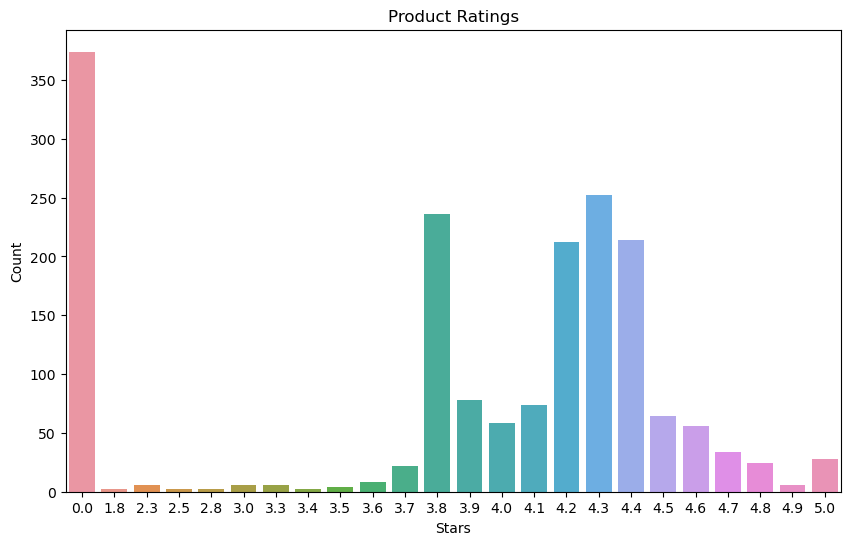

In [92]:
# Countplot for product ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='stars')
plt.title('Product Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

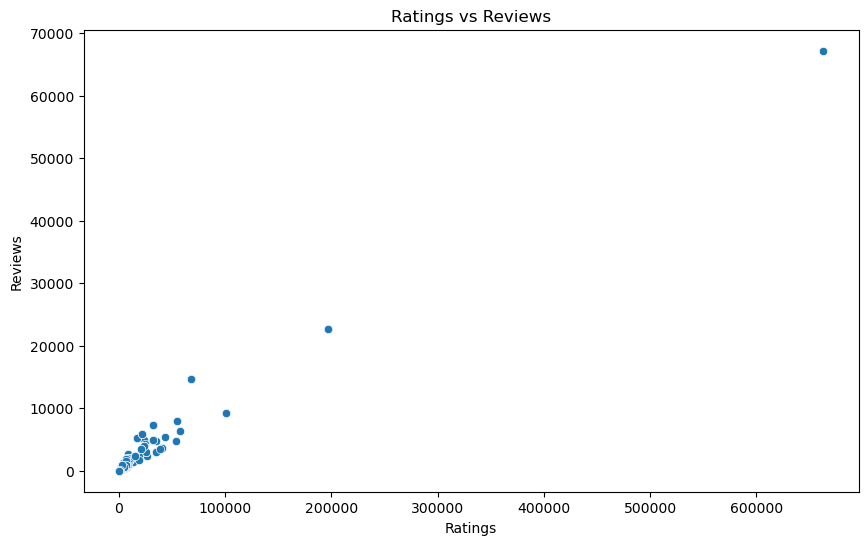

In [93]:
# Scatter plot for ratings vs reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ratings', y='reviews')
plt.title('Ratings vs Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

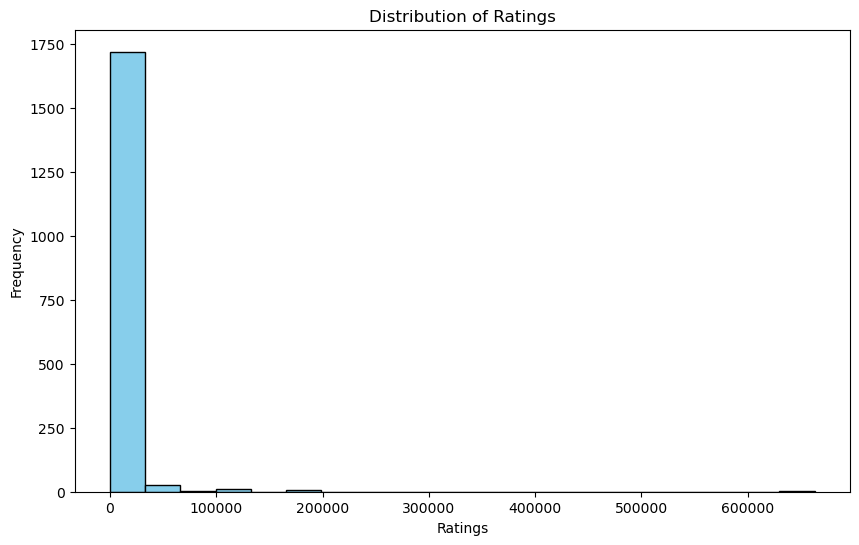

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(df1['ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


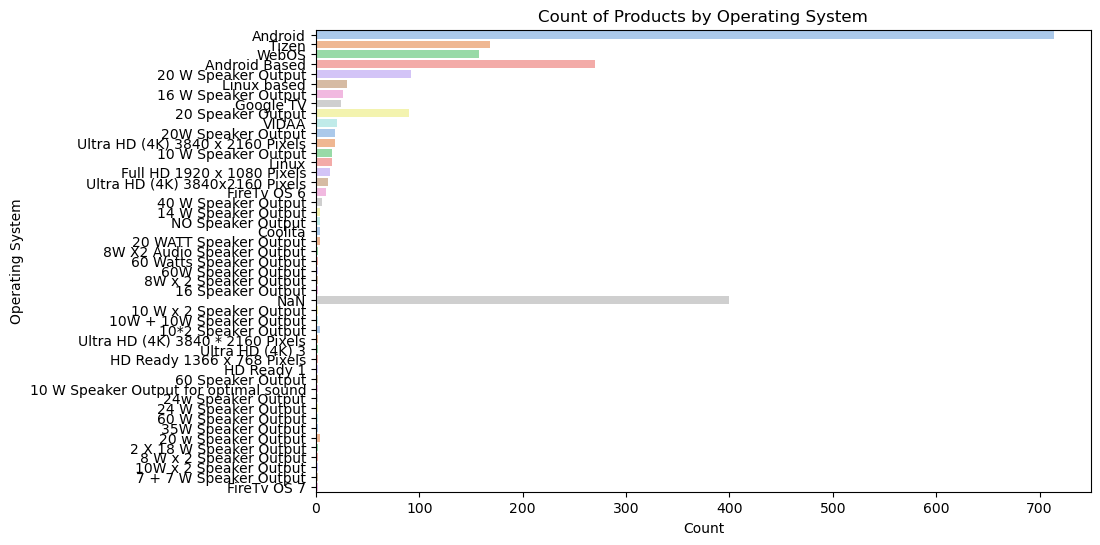

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, 
              y='operating_system', 
              order=df['operating_system'].value_counts().index, 
              palette='pastel')
plt.title('Count of Products by Operating System')
plt.xlabel('Count')
plt.ylabel('Operating System')
plt.show()


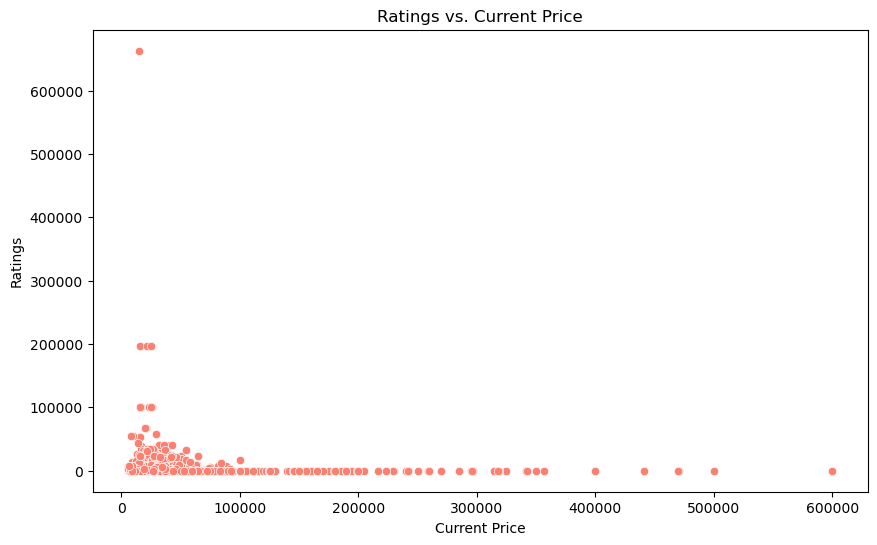

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='current_price', y='ratings', color='salmon')
plt.title('Ratings vs. Current Price')
plt.xlabel('Current Price')
plt.ylabel('Ratings')
plt.show()

<Figure size 1200x800 with 0 Axes>

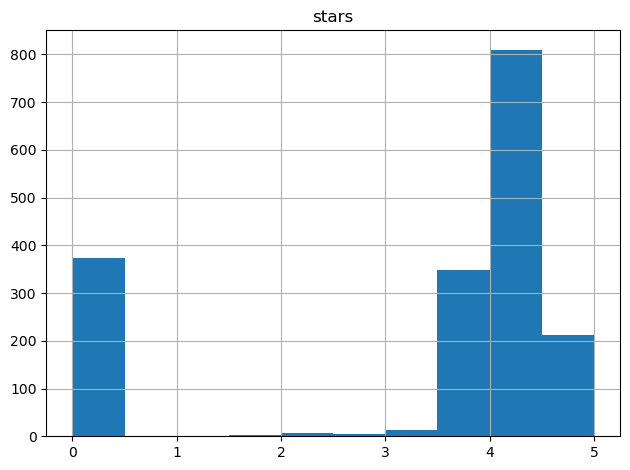

In [101]:
#Histogram for each numeric column to visualize their distributions.
plt.figure(figsize=(12, 8))
df1.hist()
plt.tight_layout()
plt.show()


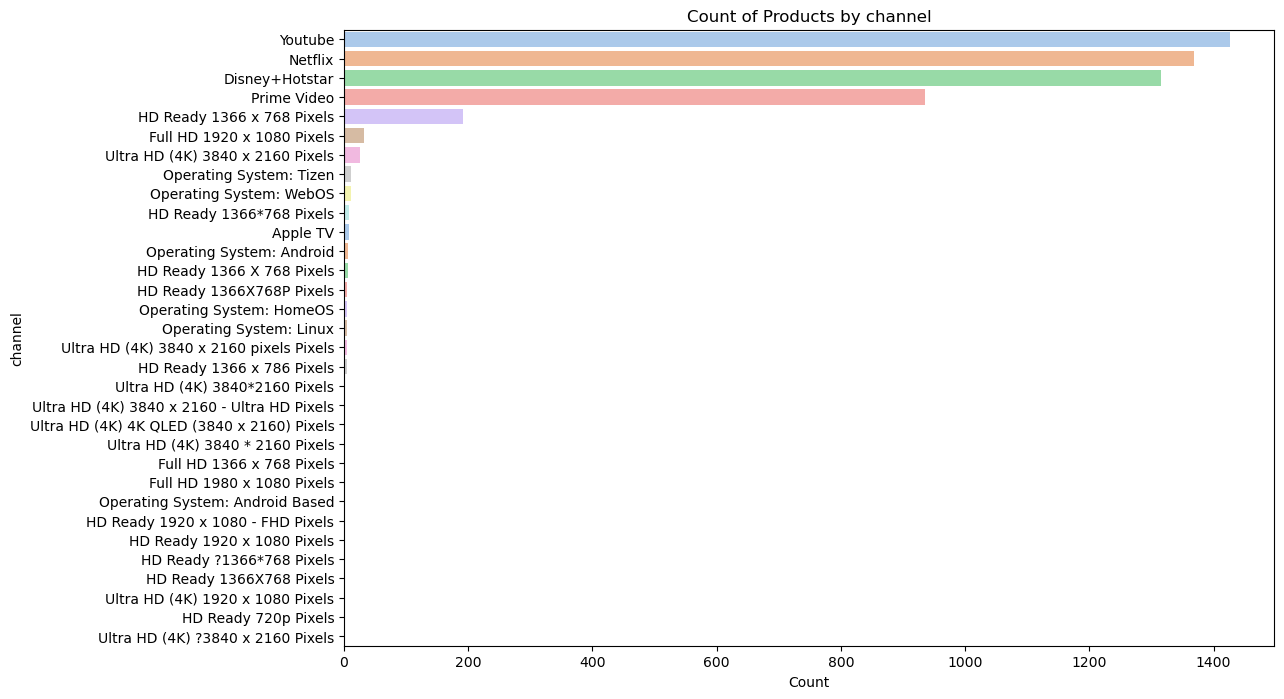

In [102]:
plt.figure(figsize=(12, 8))
for col in ['channel']:
    # Flatten the lists in the column
    flattened_values = [item for sublist in df1[col].dropna() for item in sublist]
    sns.countplot(y=flattened_values, order=pd.Series(flattened_values).value_counts().index, palette='pastel')
    plt.title(f'Count of Products by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()